Impulse Noise Application
(Salt and Pepper)

In [98]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

In [99]:
img = cv2.imread("/content/png-transparent-hummingbird-free-buckle-hummingbird-free-logo-design-template-computer-fauna-thumbnail.png", 0)
print(img.shape)
size = img.shape[0] * img.shape[1]
size1=img.shape
print(size, size1)

(360, 360)
129600 (360, 360)


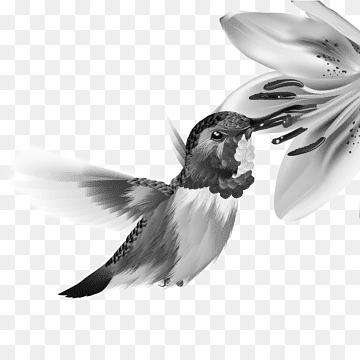

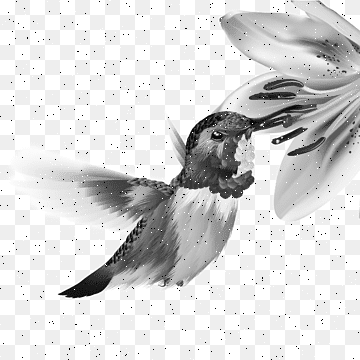

In [100]:
#Salt and Pepper Noise Application
img_sap = img.copy()
pep=0.005
salt=1-pep
for r in range(0,img.shape[0]):
  for c in range (0,img.shape[1]):
    rndm=np.random.random()
    if rndm < pep:
      img_sap[r,c]=0
    elif rndm > salt:
      img_sap[r,c]=255
    else:
      img_sap[r,c]=img[r,c]
cv2_imshow(img)
print(" ")
cv2_imshow(img_sap)

Impulse Noise Filtering

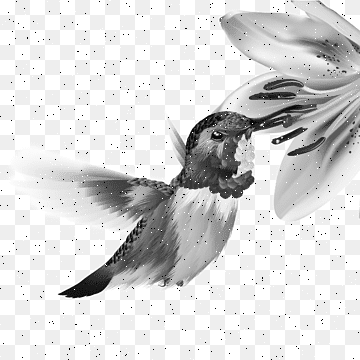

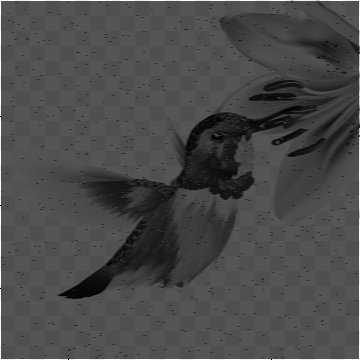

In [101]:
#Mean or Average Algorithm
img_Amean = img_sap.copy()
r=1
s=0
while r < img_sap.shape[0]-1:
  c=1
  while c < img_sap.shape[1]-1:
    i=r-1
    j=c-1
    while i<r+2:
      while j<c+2:
        s+= img_sap[i, j]
        j+=1
      i+=1
    img_Amean[r,c]=s/9
    s=0
    c+=1
  r+=1

cv2_imshow(img_sap)
print(" ")
cv2_imshow(img_Amean)

<ipython-input-102-20e575b51f51>:15: RuntimeWarning: overflow encountered in long_scalars
  s*= img_sap[r+1, c]
<ipython-input-102-20e575b51f51>:16: RuntimeWarning: overflow encountered in long_scalars
  s*= img_sap[r+1, c+1]
<ipython-input-102-20e575b51f51>:17: RuntimeWarning: invalid value encountered in power
  s=s**(1/9)


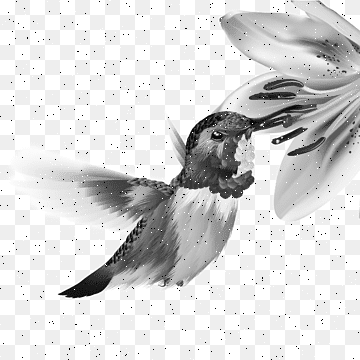

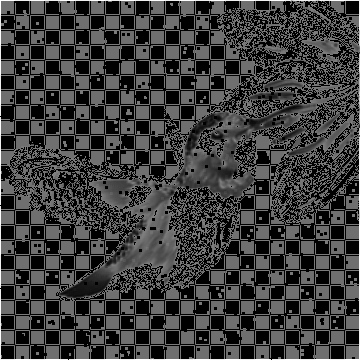

In [102]:
#Geometric Mean
img_Gmean = img_sap.copy()
r=1
s=1
while r < img_sap.shape[0]-1:
  c=1
  while c < img_sap.shape[1]-1:
    s*= img_sap[r-1, c-1]
    s*= img_sap[r-1, c]
    s*= img_sap[r-1, c+1]
    s*= img_sap[r, c-1]
    s*= img_sap[r, c]
    s*= img_sap[r, c+1]
    s*= img_sap[r+1, c-1]
    s*= img_sap[r+1, c]
    s*= img_sap[r+1, c+1]
    s=s**(1/9)
    img_Gmean[r,c]=s
    s=1
    c+=1
  r+=1

cv2_imshow(img_sap)
print(" ")
cv2_imshow(img_Gmean)

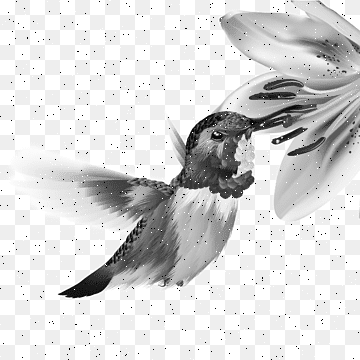

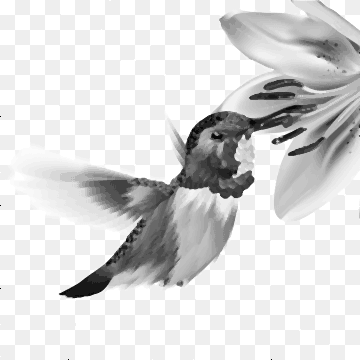

In [103]:
#Median Algorithm
img_med = img_sap.copy()
r=1
m=[]
while r < img_sap.shape[0]-1:
  c=1
  while c < img_sap.shape[1]-1:
    m.append(img_sap[r-1,c-1])
    m.append(img_sap[r-1,c])
    m.append(img_sap[r-1,c+1])
    m.append(img_sap[r,c-1])
    m.append(img_sap[r,c])
    m.append(img_sap[r,c+1])
    m.append(img_sap[r+1,c-1])
    m.append(img_sap[r+1,c])
    m.append(img_sap[r+1,c+1])
    m.sort()
    img_med[r,c]=m[4]
    m.clear()
    c+=1
  r+=1
cv2_imshow(img_sap)
print(" ")
cv2_imshow(img_med)

<ipython-input-107-84fed17d9ab0>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  s= (max+min)*(1/2)


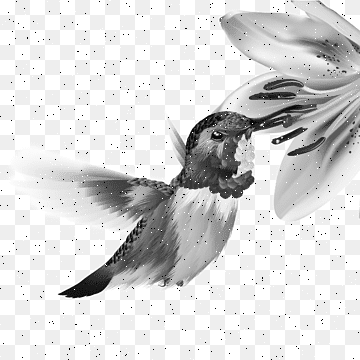

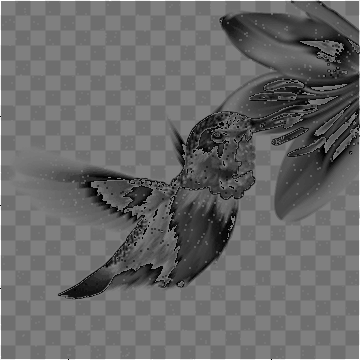

In [107]:
#Midpoint Algorithm
img_mid = img_sap.copy()
temp=[]
s=0
for r in range(1,img_sap.shape[0]-1):
  for c in range(1,img_sap.shape[1]-1):
    for i in range(r-1,r+1):
      for j in range(c-1,c+1):
        temp.append(img_sap[i,j])
    max=np.max(temp)
    min=np.min(temp)
    s= (max+min)*(1/2)
    img_mid[r,c]=s 
    temp.clear()

cv2_imshow(img_sap)
print(" ")
cv2_imshow(img_mid)

<ipython-input-108-4979687a6011>:9: RuntimeWarning: divide by zero encountered in true_divide
  sum+=1/img_sap[i,j]


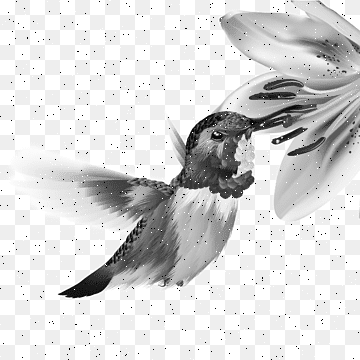

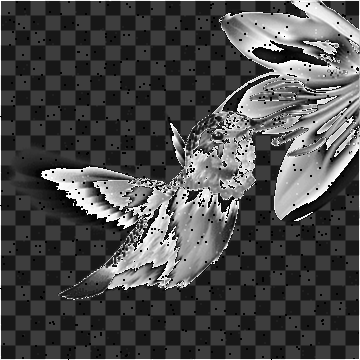

In [108]:
#Harmonic Mean Filter
img_harc=img_sap.copy()
sum=0
val=0
for r in range (1,img_sap.shape[0]-1):
  for c in range(1,img_sap.shape[1]-1):
    for i in range (r-1,r+1):
      for j in range(c-1,c+1):
        sum+=1/img_sap[i,j]
    val=(9/sum)
    img_harc[r,c]=val
    sum=0
cv2_imshow(img_sap)
print(" ")
cv2_imshow(img_harc)